<a href="https://colab.research.google.com/github/Arpit0000000/Data-Analytics-and-Visualization-Lab/blob/main/DAV_9_Experiment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Experiment - 3:** Multiple Linear Regression in Python and R

**Name:** Arpit Burley                           
**Div:** D11AD                     
**Roll no.:** 09                  
**Sub:** DAV


**Aim :** Multiple Linear Regression in Python and R

 **Lab Outcomes :** Implement various Regression techniques for prediction. (LO2)

**Tools & Libraries to be explored**                   

*   Python Libraries: scikit-learn, matplotlib, numpy, pandas                       
*   R Libraries: lm, ggplot2, dplyr, broom, ggubr




In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from skspatial.objects import Plane, Points
from skspatial.plotting import plot_3d

In [94]:
df = pd.read_csv("cereal.csv")
df.head()


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [62]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [95]:
df.dropna(inplace=True)
FEATURES = ['calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups']
TARGET = ['rating']

In [96]:
def correlate(feature, target):
  plt.scatter(df[feature], df[target])
  #plt.xlabel(feature)
  plt.ylabel(target[0])
  plt.show()

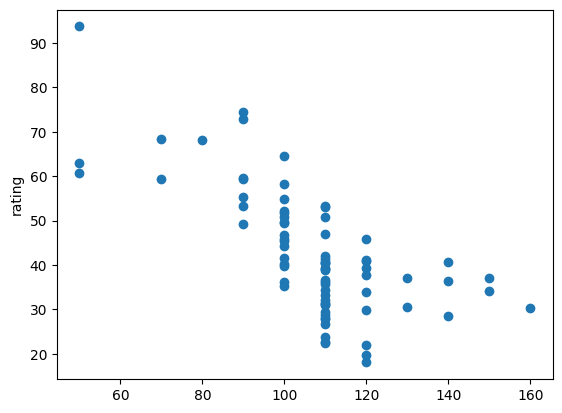

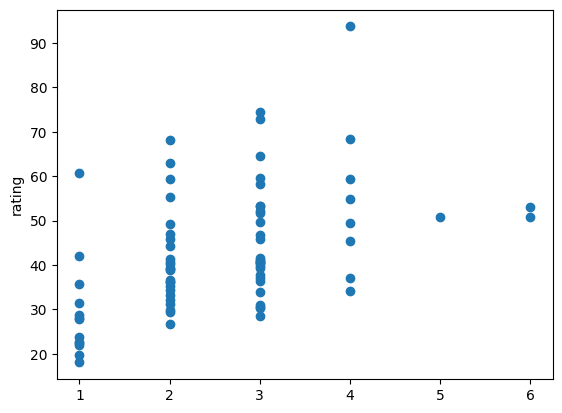

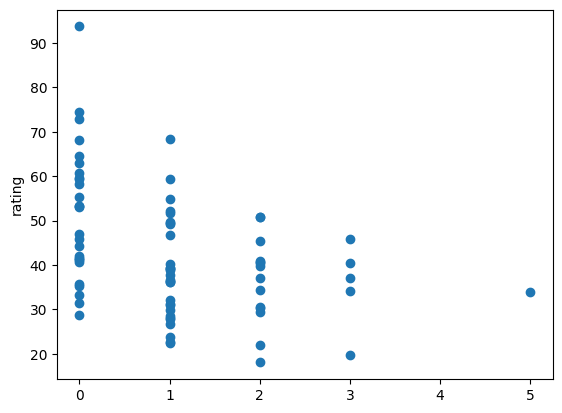

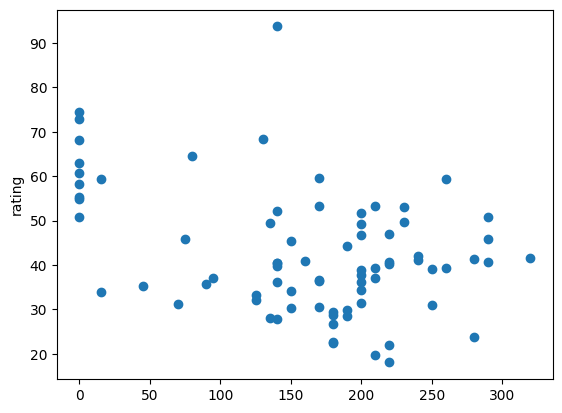

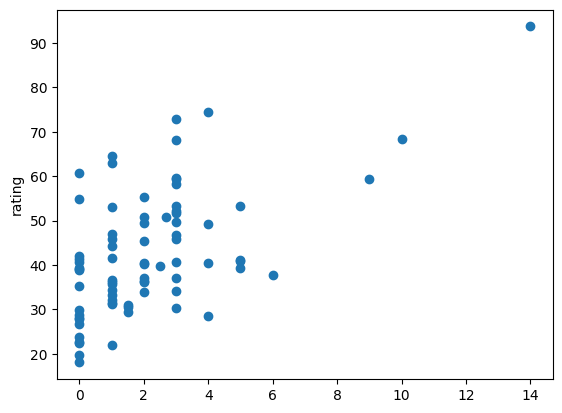

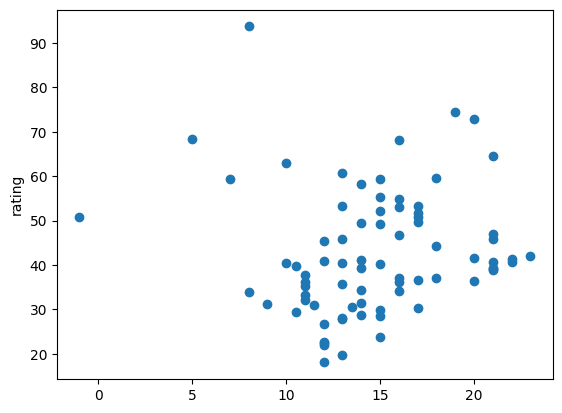

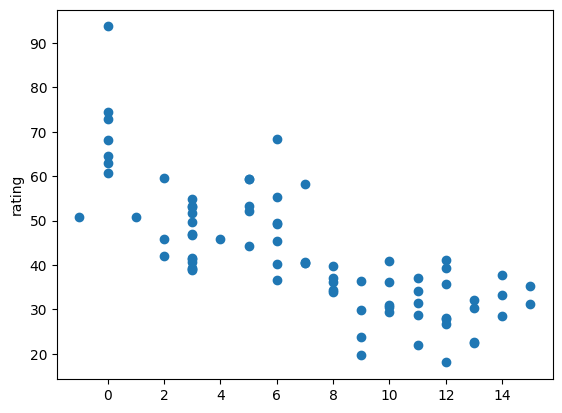

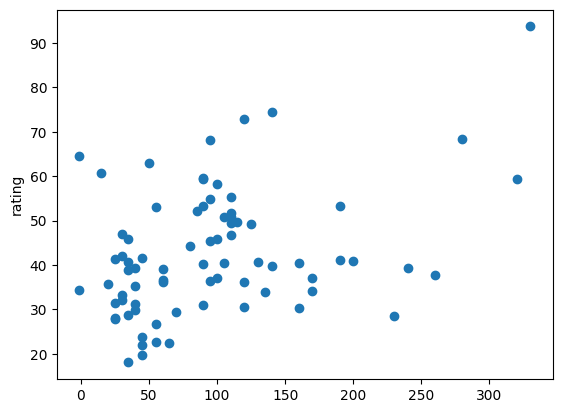

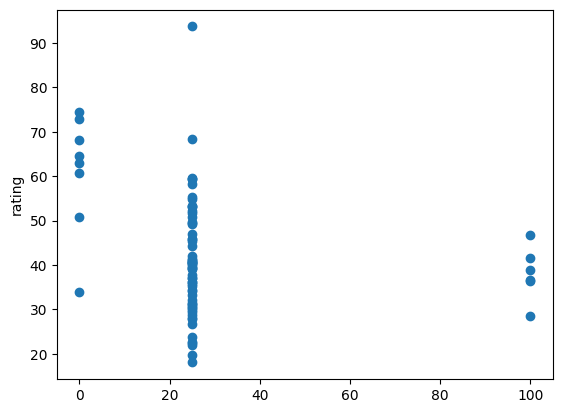

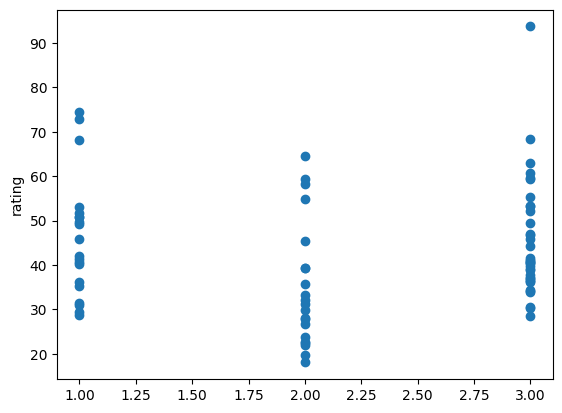

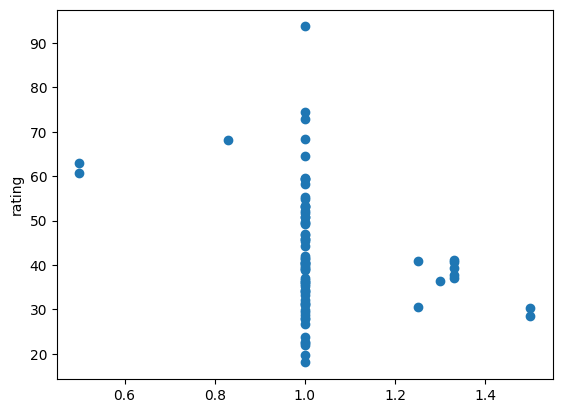

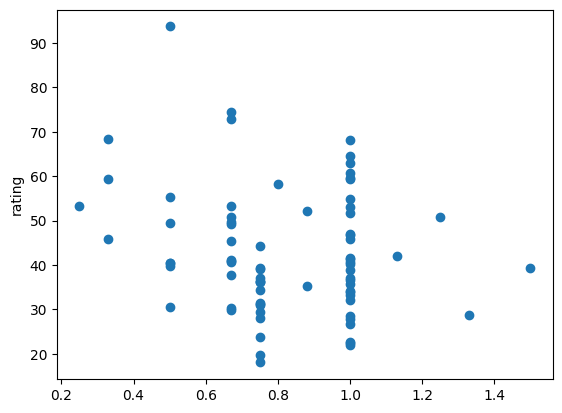

In [97]:
for i in FEATURES:
  correlate(i, TARGET)

In [98]:
X_train , X_test , y_train, y_test = train_test_split(df[FEATURES], df[TARGET], test_size=0.3, random_state=48)

In [99]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [100]:
y_pred = model.predict(X_test)
y_pred

array([[18.04285084],
       [39.7033997 ],
       [31.0722174 ],
       [49.12025288],
       [35.7827907 ],
       [29.50954074],
       [53.37100728],
       [59.64283649],
       [22.7364464 ],
       [36.5236834 ],
       [64.53381572],
       [53.31381289],
       [45.32807413],
       [40.44877243],
       [33.9836789 ],
       [31.2300544 ],
       [52.07689645],
       [44.33085557],
       [55.33314193],
       [50.76499887],
       [40.10596494],
       [32.20758142],
       [36.18755877],
       [50.82839202]])

In [101]:
model.intercept_

array([54.92718459])

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

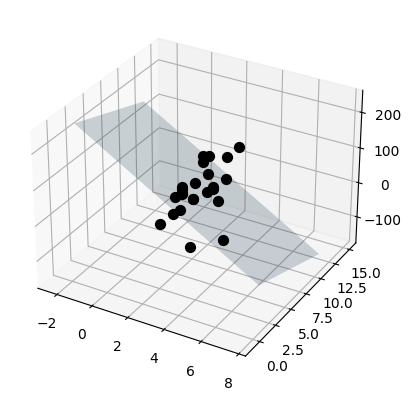

In [103]:
num_samples = min(len(X_test), len(y_pred))

points = Points([[X_test['protein'].iloc[i], X_test['sugars'].iloc[i], y_pred[i][0]] for i in range(num_samples)])
plane = Plane.best_fit(points)

plot_3d(
    points.plotter(c='k', s=50, depthshade=False),
    plane.plotter(alpha=0.2, lims_x=(-5, 5), lims_y=(-5, 5)),
)


In [104]:
r_squared = model.score(X_test, y_test)
intercept = model.intercept_
coefficients = model.coef_

In [105]:
print('Coefficient of Determination (R^2):', r_squared)
print('Intercept:', intercept)
print('Coefficients:', coefficients)

Coefficient of Determination (R^2): 0.9999999999999992
Intercept: [54.92718459]
Coefficients: [[-2.22724158e-01  3.27317384e+00 -1.69140803e+00 -5.44927023e-02
   3.44347976e+00  1.09245093e+00 -7.24895147e-01 -3.39933493e-02
  -5.12119665e-02 -8.14720340e-08 -9.05915946e-07 -5.35447144e-08]]


# Multiple Linear Regression in R

In [1]:
library(dplyr)
library(caret)
library(scatterplot3d)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




ERROR: Error in library(caret): there is no package called ‘caret’


In [26]:
data <- read.csv("cereal.csv")
head(data)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1,0.33,68.40297
2,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1,1.00,33.98368
3,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1,0.33,59.42551
4,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1,0.50,93.70491
5,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1,0.75,34.38484
6,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1,0.75,29.50954


In [27]:
X_train <- data[, c("calories", "sodium", "protein", "fat")]
y_train <- data$Performance.Index

In [30]:
model <- lm(rating ~ calories + sodium + protein + fat, data=data)

In [47]:
summary(model)


Call:
lm(formula = rating ~ calories + sodium + protein + fat, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.3808  -4.2012   0.0706   4.4175  16.3197 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 73.61175    4.94693  14.880  < 2e-16 ***
calories    -0.35744    0.04807  -7.436 1.72e-10 ***
sodium      -0.03771    0.00965  -3.908 0.000208 ***
protein      6.73109    0.71131   9.463 2.89e-14 ***
fat         -3.80524    0.90679  -4.196 7.64e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.605 on 72 degrees of freedom
Multiple R-squared:  0.7906,	Adjusted R-squared:  0.7789 
F-statistic: 67.94 on 4 and 72 DF,  p-value: < 2.2e-16


In [35]:
set.seed(48)
indexes <- sample(nrow(df), size = round(0.3 * nrow(df)))
test_data <- data[indexes, ]

In [39]:
predictions <- predict(model, newdata = test_data)
print(predictions)

      69       42       51       25       73       37       10       44 
54.33884 51.52569 55.22531 39.23703 34.52363 41.25472 53.71702 60.98701 
      74       52       45       64       13       61       39       15 
31.94034 33.31729 31.92241 58.47883 18.11597 54.90445 37.54021 30.43205 
       2       23       35       62       67       30       70 
31.32058 42.24581 36.66862 31.97485 41.31093 32.12887 36.40899 


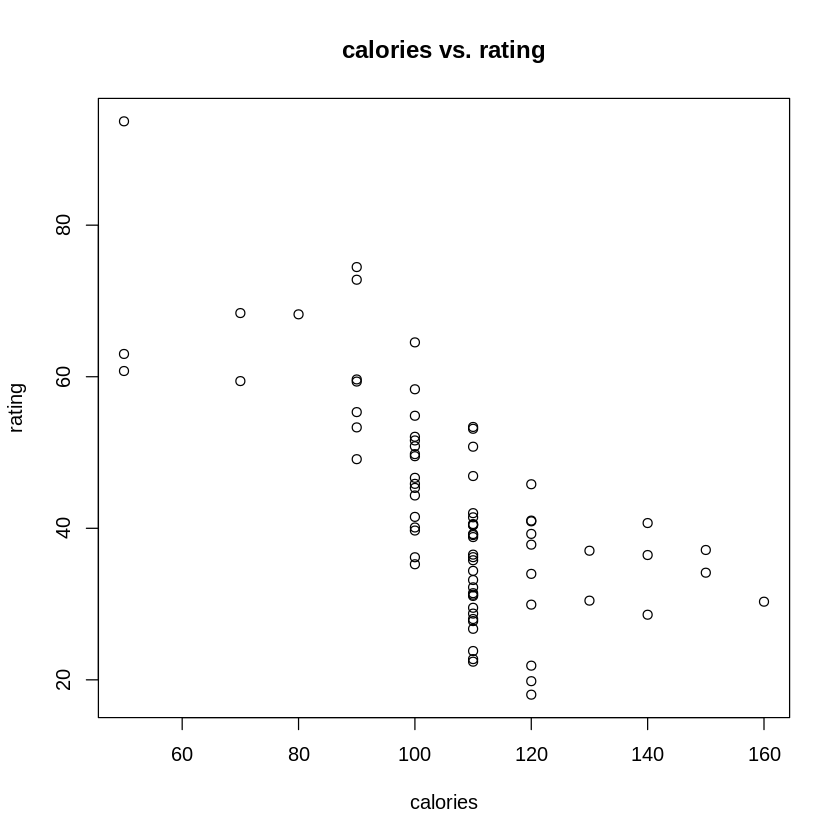

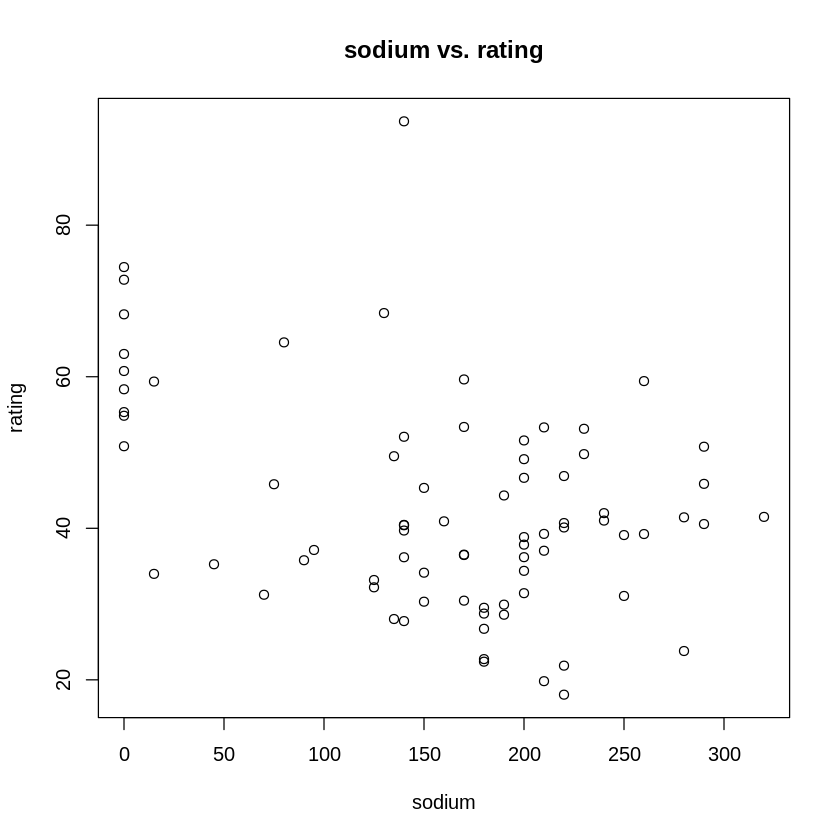

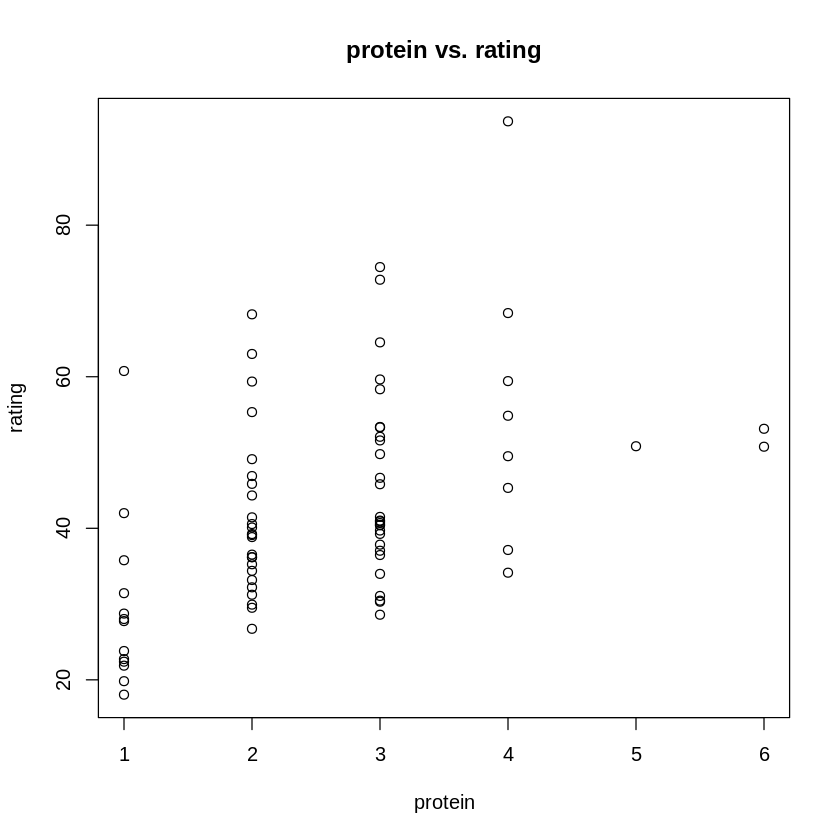

In [41]:
with(data, {
  # calories vs. rating
  plot(calories, rating,
       xlab = "calories", ylab = "rating",
       main = "calories vs. rating")

  # sodium vs. rating
  plot(sodium, rating,
       xlab = "sodium", ylab = "rating",
       main = "sodium vs. rating")

  # protein vs. rating
  plot(protein, rating,
       xlab = "protein", ylab = "rating",
       main = "protein vs. rating")
})


### **Conclusion:** We have successfully performed Multiple Linear Regression in both Python and R